<a href="https://colab.research.google.com/github/mariyam-ahmed/portfolio/blob/main/Cooperators_Policies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Executive Summary
This project aims to create a classification model to predict whether a person will purchase a car insurance policy with Cooperators. For this purpose, we will train both a logistic regression and naive-bayes model and compare them. The dataset has 26 columns and 100,000 rows initially.

Data pre-processing allows us to make the dataset ready to be used in a model. Missing values are removed, the data is cleaned to remove erroneous entries, and categorical variables are transformed using one-hot encoding. Next, some categorical variables are clustered according to geographical area to decrease the number of variables. Finally, highly-correlated columns are dropped.

After creating the models, we use metrics such as accuracy, precision, recall, f1-score, ROC curves, and confusion matrices to evaluate and compare them. Finally, the trained model is used to predict values for the test set as provided for this project and a list of values is produced.

#Downloading Libraries and loading Dataset

In [ ]:
#loading libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from google.colab import drive
import sklearn.metrics as metrics

from sklearn.metrics import confusion_matrix

In [ ]:
# Loading the dataset
df = pd.read_excel('/content/Cooperators_Quotes_Dataset_Training.xlsx')
print(len(df))
df.head()

101891


,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


#Data Exploration

In order to understand the dataset and the type of variables in it, the data type and unique values of each variable is displayed below. We can see that many variables are categorical, and these variables also have several unique values, sometimes even thousands.

In [ ]:
#printing all unique elements of every column
for col in df:
    print(df[col].name, df[col].dtype)
    print("Unique:", len(df[col].unique()))
    print(df[col].unique())
    print("-------------------------------------------------------------------------------------------------------")


QUOTEDATE datetime64[ns]
Unique: 346
['2016-01-02T00:00:00.000000000' '2016-01-04T00:00:00.000000000'
 '2016-01-05T00:00:00.000000000' '2016-01-06T00:00:00.000000000'
 '2016-01-07T00:00:00.000000000' '2016-01-08T00:00:00.000000000'
 '2016-01-09T00:00:00.000000000' '2016-01-10T00:00:00.000000000'
 '2016-01-11T00:00:00.000000000' '2016-01-12T00:00:00.000000000'
 '2016-01-13T00:00:00.000000000' '2016-01-14T00:00:00.000000000'
 '2016-01-15T00:00:00.000000000' '2016-01-16T00:00:00.000000000'
 '2016-01-17T00:00:00.000000000' '2016-01-18T00:00:00.000000000'
 '2016-01-19T00:00:00.000000000' '2016-01-20T00:00:00.000000000'
 '2016-01-21T00:00:00.000000000' '2016-01-22T00:00:00.000000000'
 '2016-01-23T00:00:00.000000000' '2016-01-25T00:00:00.000000000'
 '2016-01-26T00:00:00.000000000' '2016-01-27T00:00:00.000000000'
 '2016-01-28T00:00:00.000000000' '2016-01-29T00:00:00.000000000'
 '2016-01-30T00:00:00.000000000' '2016-01-31T00:00:00.000000000'
 '2016-02-01T00:00:00.000000000' '2016-02-02T00:00:00

We can see above that the variables gender, area code and occupation have values such as 'unknown' which count as missing values but cannot be counted using functions such as isnan(). So we print the number of such missing values in these columns, and we see that the number of missing values in gender and area code are not significant, but are very significant for occupation.

In [ ]:
len(df[df['GENDER'] == 'Unknown'])/len(df)

9.814409516051467e-06

In [ ]:
len(df[df['AREA_CODE'] == 'Unk'])/len(df)

0.014682356636012995

In [ ]:
len(df[df['OCCUPATION'] == 'Not Known'])/len(df)

0.9028373457910904

###Missing values

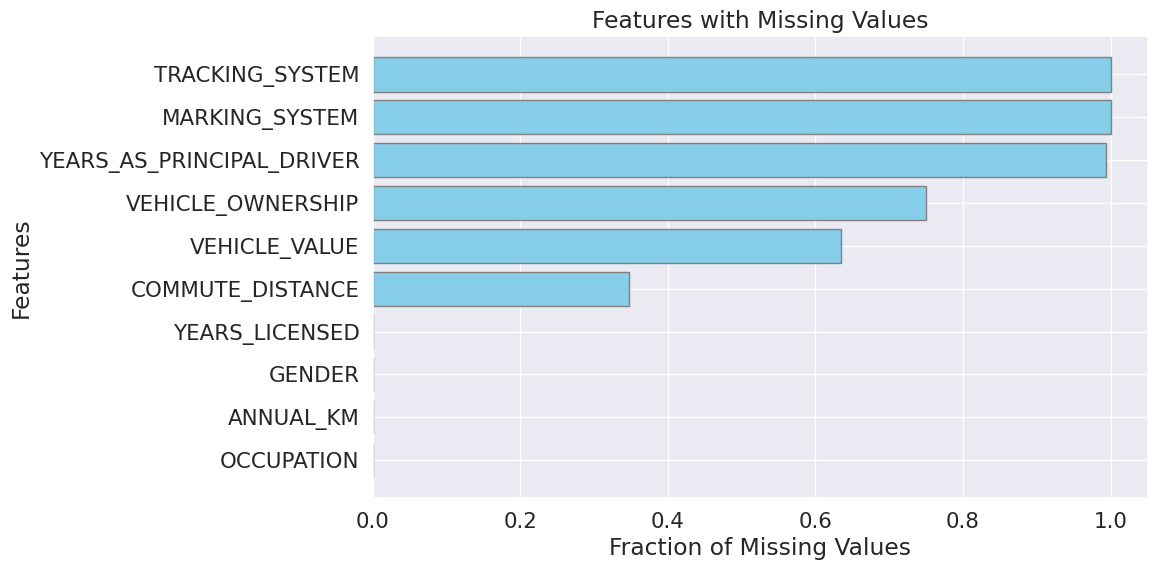

In [ ]:
#making a bar plot to show missing values
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

##Exploring categorical variables

'vehicle make' and 'vehicle model' have several unique values. To determine whether they should be converted to one-hot encoded variables, we count which values of these variables have atleast 5% of the dataset, to ensure these categories are significant.

In [ ]:
#printing all the values of VEHICLE_MAKE that represent atleast 5% of the dataset
count = 0
for i in range(len(df['VEHICLEMAKE'].unique())):
  if sum(df['VEHICLEMAKE']==df['VEHICLEMAKE'].unique()[i]) > 5000:
    print(df['VEHICLEMAKE'].unique()[i], sum(df['VEHICLEMAKE']==df['VEHICLEMAKE'].unique()[i]))
    count = count + 1

print('count: ', count)

TOYOTA 8208
HONDA 9092
CHEVROLET 5201
FORD TRUCK/VAN 7851
DODGE/RAM TRUCK/VAN 6826
count:  5


In [ ]:
#printing all the values of VEHICLE_MODEL that represent atleast 5% of the dataset
count = 0
for i in range(len(df['VEHICLEMODEL'].unique())):
  if sum(df['VEHICLEMODEL']==df['VEHICLEMODEL'].unique()[i]) > 5000:
    print(df['VEHICLEMODEL'].unique()[i], sum(df['VEHICLEMODEL']==df['VEHICLEMODEL'].unique()[i]))
    count = count + 1

print('count: ', count)

#Pre-processing

We remove some variables below which contain a large fraction of missing values as seen in the section above. We also drop the variable 'vehicle make' since it has too many unique values that when converted to seperate variables would not have a significant affect on the dependent variable.

In [ ]:
df = df.drop(columns = 'TRACKING_SYSTEM')
df = df.drop(columns = 'MARKING_SYSTEM')
df = df.drop(columns = 'YEARS_AS_PRINCIPAL_DRIVER')
df = df.drop(columns = 'VEHICLE_OWNERSHIP')
df = df.drop(columns = 'VEHICLE_VALUE')
df = df.drop(columns = 'COMMUTE_DISTANCE')
df = df.drop(columns = 'OCCUPATION')

df = df.drop(columns = 'VEHICLEMODEL')

In [ ]:
df = df.dropna()

##Data cleaning

In [ ]:
#replacing 9999 value in YOB variable with 1999
df['YEAR_OF_BIRTH'] = df['YEAR_OF_BIRTH'].replace(9999, 1999)

In [ ]:
#counting how many rows have DOB that would be too young to have a license
print(sum(df['YEAR_OF_BIRTH']>2005))

13


In [ ]:
#dropping these rows since its very few
df = df[(df['YEAR_OF_BIRTH'] < 2005)]

In [ ]:
#counting how many rows have YEARS_LICENSED that would be too large taking into account the lifespan of humans
print(sum(df['YEARS_LICENSED'] < 0))
print(sum(df['YEARS_LICENSED'] > 75))

0
30


In [ ]:
#dropping these rows since its very few
df = df[(df['YEARS_LICENSED'] < 75)]

In [ ]:
df

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,ANNUAL_KM,VEHICLEUSE,GENDER,YEAR_OF_BIRTH,POSTAL_CODE,AREA_CODE,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,10000.0,Pleasure,Male,1975,J7E,514,25.0,No,Married,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,20000.0,Business,Male,1958,L0R,905,10.0,No,Married,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,15000.0,Pleasure,Male,1960,T5C,403,39.0,No,Single,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,20000.0,Commute,Male,1985,L6T,289,3.0,Yes,Single,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,30000.0,Commute,Male,1982,L3R,416,2.0,Yes,Single,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101886,2016-12-30,2000,SATURN,20000.0,Commute,Male,1964,L6R,905,15.0,No,Married,0,0,0,0,0,0
101887,2016-12-30,2004,HONDA,10000.0,Pleasure,Male,1980,E4P,506,19.0,Yes,Single,0,0,0,0,0,0
101888,2016-12-30,2011,KIA TRUCK/VAN,15000.0,Commute,Female,1983,E8J,418,16.0,No,Single,0,0,0,0,0,0
101889,2016-12-30,2005,PONTIAC,10000.0,Commute,Male,1965,A0A,709,31.0,No,Married,0,0,0,0,0,1


###Clustering Variables: Area Code and Postal Code

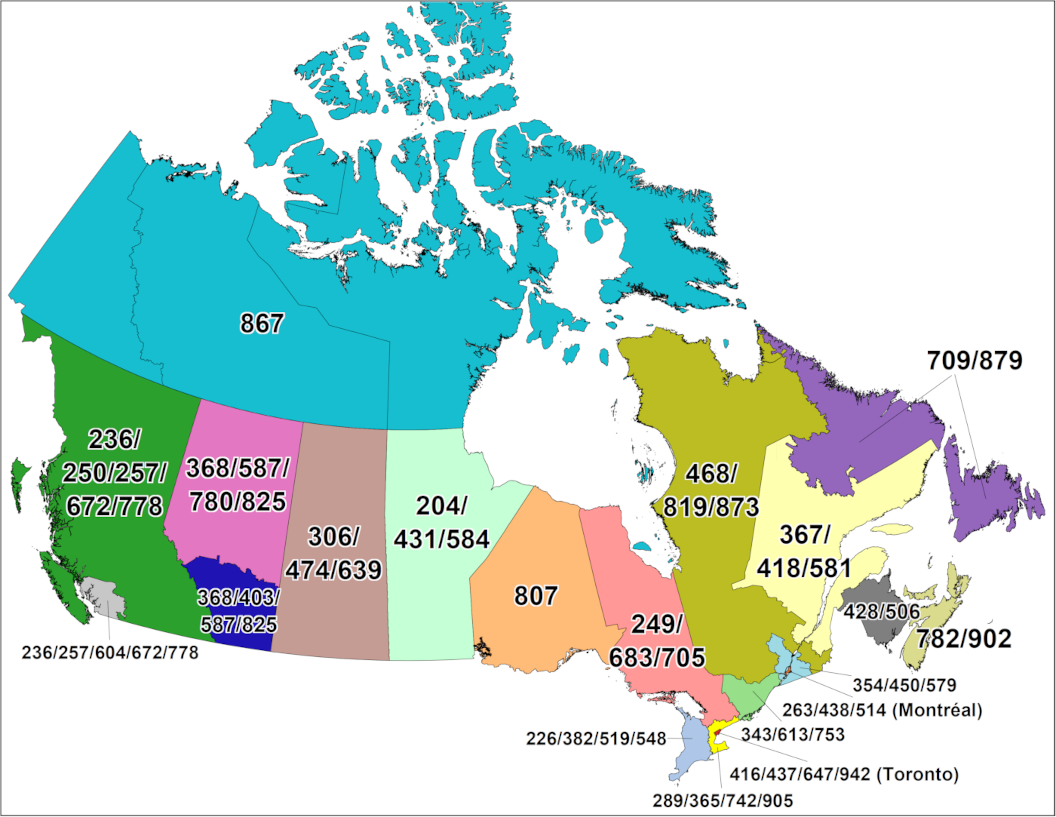

Source: Canadian Numbering Administrator
https://www.cnac.ca/index.htm



In [ ]:
#clustering AREA_CODE by geographic location to reduce number of variables
area_1 = [867]
area_2 = [236,250,257,672,778]
area_3 = [368, 587, 780, 825]
area_4 = [368,403,587,825]
area_5 = [236,257,604,672,778]
area_6 = [306,474,639]
area_7 = [204,431,584]
area_8 = [807]
area_9 = [249, 683, 705]
area_10 = [226,382,519,548]
area_11 = [289,365,742,905]
area_12 = [416,437,647,942]
area_13 = [343,613,753]
area_14 = [263,438,514]
area_15= [354, 450, 579]
area_16 = [782, 902]
area_17 = [428,506]
area_18 = [367, 418, 581]
area_19 = [468,819,873]
area_20 = [709,879]

df['AREA_1'] = df['AREA_CODE'].isin(area_1)
df['AREA_2'] = df['AREA_CODE'].isin(area_2)
df['AREA_3'] = df['AREA_CODE'].isin(area_3)
df['AREA_4'] = df['AREA_CODE'].isin(area_4)
df['AREA_5'] = df['AREA_CODE'].isin(area_5)
df['AREA_6'] = df['AREA_CODE'].isin(area_6)
df['AREA_7'] = df['AREA_CODE'].isin(area_7)
df['AREA_8'] = df['AREA_CODE'].isin(area_8)
df['AREA_20'] = df['AREA_CODE'].isin(area_20)
df['AREA_9'] = df['AREA_CODE'].isin(area_9)
df['AREA_10'] = df['AREA_CODE'].isin(area_10)
df['AREA_11'] = df['AREA_CODE'].isin(area_11)
df['AREA_12'] = df['AREA_CODE'].isin(area_12)
df['AREA_13'] = df['AREA_CODE'].isin(area_13)
df['AREA_14'] = df['AREA_CODE'].isin(area_14)
df['AREA_15'] = df['AREA_CODE'].isin(area_15)
df['AREA_16'] = df['AREA_CODE'].isin(area_16)
df['AREA_17'] = df['AREA_CODE'].isin(area_17)
df['AREA_18'] = df['AREA_CODE'].isin(area_18)
df['AREA_19'] = df['AREA_CODE'].isin(area_19)

ccopg1548-address-map.svg
Source: Canada Post
https://www.canadapost-postescanada.ca/cpc/en/support/articles/addressing-guidelines/postal-codes.page

In [ ]:
#clustering POSTAL_CODE by geographic location to reduce number of variables
df['POST_1'] = df['POSTAL_CODE'].str.startswith('Y')
df['POST_2'] = df['POSTAL_CODE'].str.startswith('X')
df['POST_3'] = df['POSTAL_CODE'].str.startswith('V')
df['POST_4'] = df['POSTAL_CODE'].str.startswith('T')
df['POST_5'] = df['POSTAL_CODE'].str.startswith('S')
df['POST_6'] = df['POSTAL_CODE'].str.startswith('R')
df['POST_7'] = df['POSTAL_CODE'].str.startswith('P')
df['POST_8'] = df['POSTAL_CODE'].str.startswith('N')
df['POST_9'] = df['POSTAL_CODE'].str.startswith('M')
df['POST_10'] = df['POSTAL_CODE'].str.startswith('L')
df['POST_11'] = df['POSTAL_CODE'].str.startswith('K')
df['POST_12'] = df['POSTAL_CODE'].str.startswith('H')
df['POST_13'] = df['POSTAL_CODE'].str.startswith('J')
df['POST_14'] = df['POSTAL_CODE'].str.startswith('G')
df['POST_15'] = df['POSTAL_CODE'].str.startswith('A')
df['POST_16'] = df['POSTAL_CODE'].str.startswith('C')
df['POST_17'] = df['POSTAL_CODE'].str.startswith('B')
df['POST_18'] = df['POSTAL_CODE'].str.startswith('E')


In [ ]:
df = df.drop(columns = 'AREA_CODE')
df = df.drop(columns = 'POSTAL_CODE')
df

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,ANNUAL_KM,VEHICLEUSE,GENDER,YEAR_OF_BIRTH,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,...,POST_9,POST_10,POST_11,POST_12,POST_13,POST_14,POST_15,POST_16,POST_17,POST_18
0,2016-01-02,2006,VOLKSWAGEN,10000.0,Pleasure,Male,1975,25.0,No,Married,...,False,False,False,False,True,False,False,False,False,False
1,2016-01-02,2017,HYUNDAI,20000.0,Business,Male,1958,10.0,No,Married,...,False,True,False,False,False,False,False,False,False,False
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,15000.0,Pleasure,Male,1960,39.0,No,Single,...,False,False,False,False,False,False,False,False,False,False
3,2016-01-02,2010,TOYOTA,20000.0,Commute,Male,1985,3.0,Yes,Single,...,False,True,False,False,False,False,False,False,False,False
4,2016-01-04,2013,HONDA,30000.0,Commute,Male,1982,2.0,Yes,Single,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101886,2016-12-30,2000,SATURN,20000.0,Commute,Male,1964,15.0,No,Married,...,False,True,False,False,False,False,False,False,False,False
101887,2016-12-30,2004,HONDA,10000.0,Pleasure,Male,1980,19.0,Yes,Single,...,False,False,False,False,False,False,False,False,False,True
101888,2016-12-30,2011,KIA TRUCK/VAN,15000.0,Commute,Female,1983,16.0,No,Single,...,False,False,False,False,False,False,False,False,False,True
101889,2016-12-30,2005,PONTIAC,10000.0,Commute,Male,1965,31.0,No,Married,...,False,False,False,False,False,False,True,False,False,False


### Convert Nominal Features to One-Hot-Encoding



In [ ]:
#one-hot encoding nominal variables
# Find remaining features of string type
string_columns = [col for col in df.columns if df[col].dtype == 'object']

# Convert string columns to one-hot encodings
df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)

below, i filter the vehicle make columns to only keep those with a significant number of rows (5%).

In [ ]:
#removing all vehicle make nominal variables which do not have atleast 5% of row count
makes = ['VEHICLEMAKE_TOYOTA', 'VEHICLEMAKE_HONDA','VEHICLEMAKE_CHEVROLET','VEHICLEMAKE_FORD TRUCK/VAN','VEHICLEMAKE_DODGE/RAM TRUCK/VAN'] #list obtained from first section
for col in df.columns:

  if col.startswith('VEHICLEMAKE_'):
    if col in makes:
      print(col)
    else:
      df = df.drop(columns = col )

VEHICLEMAKE_CHEVROLET
VEHICLEMAKE_DODGE/RAM TRUCK/VAN
VEHICLEMAKE_FORD TRUCK/VAN
VEHICLEMAKE_HONDA
VEHICLEMAKE_TOYOTA


###Convert Dates

We convert 'quote date' from date time data type to numeric so the model can process it. However this process creates very large values, so we scale it and other continuous variables in the dataset.

In [ ]:
df['QUOTEDATE'] = pd.to_numeric(df['QUOTEDATE'])
cols_to_norm = ['QUOTEDATE','VEHICLEYEAR', 'ANNUAL_KM', 'YEAR_OF_BIRTH', 'YEARS_LICENSED']

In [ ]:
df[cols_to_norm]=(df[cols_to_norm]-df[cols_to_norm].min())/(df[cols_to_norm].max()-df[cols_to_norm].min())

###Drop Highly Correlated Features

Correlated features essentially convey the same information, which can lead to model redundancy. Removing them reduces the complexity of the model and can make it more interpretable.

In [ ]:
# Set the correlation threshold for considering features as highly correlated
correlation_threshold = 0.95

# Iterate through pairs of features and measure the correlation
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        correlation = df[feature1].corr(df[feature2])

        # Check if the correlation is above the threshold
        if abs(correlation) > correlation_threshold:
            print(f'High correlation between {feature1} and {feature2} (Correlation: {correlation:.2f})')

High correlation between AREA_20 and POST_15 (Correlation: 0.96)
High correlation between AREA_17 and POST_18 (Correlation: 0.95)
High correlation between GENDER_Female and GENDER_Male (Correlation: -1.00)
High correlation between MULTI_PRODUCT_No and MULTI_PRODUCT_Yes (Correlation: -1.00)


In [ ]:
df = df.drop(columns = ['GENDER_Male', 'MULTI_PRODUCT_No', 'AREA_20', 'AREA_17'])
df = df.drop(columns = ['VEHICLEUSE_Fire Department -  Non-Emergency','VEHICLEUSE_Fisherman','VEHICLEUSE_Police Emergency/Patrol','VEHICLEUSE_Rally','GENDER_Unknown'])

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101825 entries, 0 to 101890
Data columns (total 66 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   QUOTEDATE                        101825 non-null  float64
 1   VEHICLEYEAR                      101825 non-null  float64
 2   ANNUAL_KM                        101825 non-null  float64
 3   YEAR_OF_BIRTH                    101825 non-null  float64
 4   YEARS_LICENSED                   101825 non-null  float64
 5   CONVICTION_COUNT_MINOR_3YRS      101825 non-null  int64  
 6   CONVICTION_COUNT_MAJOR_3YRS      101825 non-null  int64  
 7   CONVICTION_COUNT_CRIMINAL_3YRS   101825 non-null  int64  
 8   ASSIGNED_LOSSES_PD_5YRS          101825 non-null  int64  
 9   SUSPENSION_COUNT                 101825 non-null  int64  
 10  IS_BOUND                         101825 non-null  int64  
 11  AREA_1                           101825 non-null  bool   
 12  AR

#Modelling

First, I wanted to use forward selection to reduce the size of the model, but the accuracy and AUC for both training and validation sets decreased when I used the subset selected by forward selection. So I decided to use the full model but have kept the forward selection code for reference.

In [ ]:
Y = df['IS_BOUND']
X = df.drop(columns = ['IS_BOUND'])

In [ ]:
from sklearn.model_selection import train_test_split

def forward_subset_selection(X,y,my_test_size=0.5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=3)

  def processSubset(feature_set, X_train, y_train, X_test, y_test):
      # Fit model on feature_set and calculate RSS
      model = LogisticRegression(fit_intercept=True, class_weight = 'balanced', max_iter = 2000, penalty='l2', warm_start = True) # Large C for no regularization
      regr = model.fit(X_train[list(feature_set)], y_train)
      conf = metrics.confusion_matrix(y_test,regr.predict_proba(X_test[list(feature_set)])[:,1]>0.5)
      RMSE = (5.50*(conf[1,1]))-(1.00*(conf[0,1]+conf[1,1]))
      return {'features':feature_set, 'model':regr, 'metric':RMSE}

  def forward(predictors, X_train, y_train, X_test, y_test):

      # Pull out predictors we still need to process
      remaining_predictors = [p for p in X_train.columns if p not in predictors]
      results = []

      for p in remaining_predictors:
        results.append(processSubset(np.append(predictors,p), X_train, y_train, X_test, y_test))

      # Wrap everything up in a nice dataframe
      models = pd.DataFrame(results)
      print("----Models tried in this round----\n", models[['features','metric']] )

      # Choose the model with the minimum RMSE
      best_model = models.loc[models['metric'].astype(float).idxmax()]

      # Return the best model, along with some other useful information about the model
      return best_model

  models_train = pd.DataFrame(columns=['metric', 'model'])

  predictors = []

  for i in range(1,len(X.columns)+1):
      models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
      predictors = models_train.loc[i]['model'].feature_names_in_#.model.exog_names

  plt.plot(models_train['metric'],'ob')
  plt.xlabel('# Predictors')
  plt.ylabel('metric')

  best_n_vars = models_train['metric'].astype(float).idxmax()
  best_RMSE = models_train['metric'].max()
  #Note: the plus 1 accounts for starting at 0 vs at 1 in the indexing
  plt.plot(best_n_vars, best_RMSE, 'or');
  plt.title(f"Best #Vars = {best_n_vars}")
  print("==========")
  print(f"Best number of vars found: {best_n_vars}")
  print(f"Best model found: {models_train.loc[best_n_vars]['model'].feature_names_in_}")



----Models tried in this round----
                           features  metric
0                      [QUOTEDATE]  5002.0
1                    [VEHICLEYEAR]  5467.0
2                      [ANNUAL_KM]  5024.5
3                  [YEAR_OF_BIRTH]  8114.5
4                 [YEARS_LICENSED]  3310.5
..                             ...     ...
65        [MARITAL_STATUS_Married]  5571.0
66      [MARITAL_STATUS_Separated]   372.0
67         [MARITAL_STATUS_Single]  4812.0
68        [MARITAL_STATUS_Unknown]   238.5
69  [MARITAL_STATUS_Widow/Widower]   124.5

[70 rows x 2 columns]
----Models tried in this round----
                                              features   metric
0                      [MULTI_PRODUCT_Yes, QUOTEDATE]  12549.5
1                    [MULTI_PRODUCT_Yes, VEHICLEYEAR]  12540.0
2                      [MULTI_PRODUCT_Yes, ANNUAL_KM]  12549.5
3                  [MULTI_PRODUCT_Yes, YEAR_OF_BIRTH]  12206.0
4                 [MULTI_PRODUCT_Yes, YEARS_LICENSED]  12549.5
..         

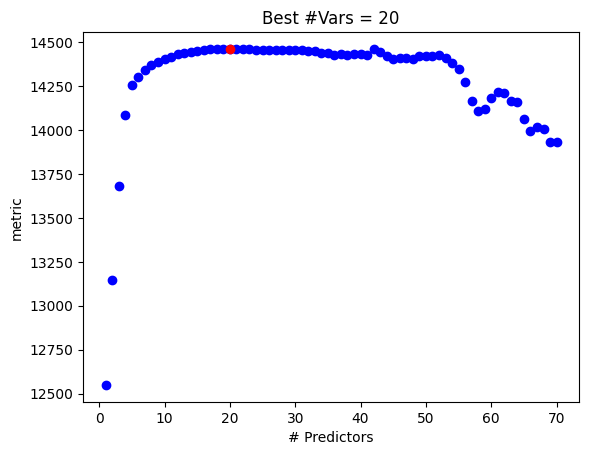

In [ ]:
forward_subset_selection(X,Y)

##Logistic Regression

In [ ]:
Y = df['IS_BOUND']
X = df.drop(columns = ['IS_BOUND'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

glm_model = LogisticRegression(fit_intercept=True, class_weight = 'balanced', max_iter = 2000, penalty='l2', warm_start = True) # Large C for no regularization


In [ ]:
glm_fit = glm_model.fit(X_train, y_train)
dictn = dict(zip(X_train.columns,glm_fit.coef_[0]))
print("Coefficients:")
dictn

Coefficients:


{'QUOTEDATE': 0.05289545151119235,
 'VEHICLEYEAR': -0.6922744015576409,
 'ANNUAL_KM': -0.20007672293197004,
 'YEAR_OF_BIRTH': 1.2038571164942613,
 'YEARS_LICENSED': 0.6755518660364028,
 'CONVICTION_COUNT_MINOR_3YRS': -0.016716077148907854,
 'CONVICTION_COUNT_MAJOR_3YRS': -0.7722369495411538,
 'CONVICTION_COUNT_CRIMINAL_3YRS': -0.18513757115016022,
 'ASSIGNED_LOSSES_PD_5YRS': -0.06677196346971868,
 'SUSPENSION_COUNT': 0.17717928875199865,
 'AREA_1': -0.013997627717316628,
 'AREA_2': 0.38268531361461705,
 'AREA_3': 0.1808839420122234,
 'AREA_4': 0.17569123734690423,
 'AREA_5': 0.3954263606254802,
 'AREA_6': 0.35786203614229406,
 'AREA_7': 0.0652257244432261,
 'AREA_8': 0.5519378061298922,
 'AREA_9': 0.44308539755876075,
 'AREA_10': 0.2278147948669702,
 'AREA_11': 0.07902953998170968,
 'AREA_12': 0.12641866815272979,
 'AREA_13': 0.07085766065103026,
 'AREA_14': -0.08044453789660186,
 'AREA_15': -0.834309548793436,
 'AREA_16': -0.03024573744890055,
 'AREA_18': 0.19638360870573518,
 'AREA_1

###Evaluation

The test and train accuracy are close in value, indicating that there isn't much overfitting.

In [ ]:
#weighted accuracy for train set - training accuracy
from sklearn.metrics import balanced_accuracy_score
accuracy = balanced_accuracy_score(y_train, glm_fit.predict_proba(X_train)[:,1]>0.45)
accuracy

0.5926572744980603

In [ ]:
#weighted accuracy for test set - testing accuracy
from sklearn.metrics import balanced_accuracy_score
accuracy = balanced_accuracy_score(y_test, glm_fit.predict_proba(X_test)[:,1]>0.45)
accuracy

0.5938768442332896

I also print the precision, recall, and f1 score below. The precision is how much of the predicted class is actually that label. The recall is how much of the actual class was correctly classified. The f1 score is another formulation that indicates the accuracy of the model by using false positive and false negative rates. It is usually a better indicator for datasets with imbalanced classes than accuracy.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not bound', 'is bound']
print(classification_report(y_test, glm_model.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

   not bound       0.85      0.59      0.69     15951
    is bound       0.29      0.61      0.40      4414

    accuracy                           0.59     20365
   macro avg       0.57      0.60      0.55     20365
weighted avg       0.73      0.59      0.63     20365



Below is the ROC curve, that plots the false positive rate of the model against the true positive rate of the model at different thresholds. The closer the area under the curve (AUC) is to 1, the more accurate the model is. The AUC of this model is 0.6.

The cell below also visualizes the confusion matrix and the metric we were asked to maximize: Revenue = \$5.50\*(Number of True Positives) - \$1.00\*(Number of total 1's predicted)

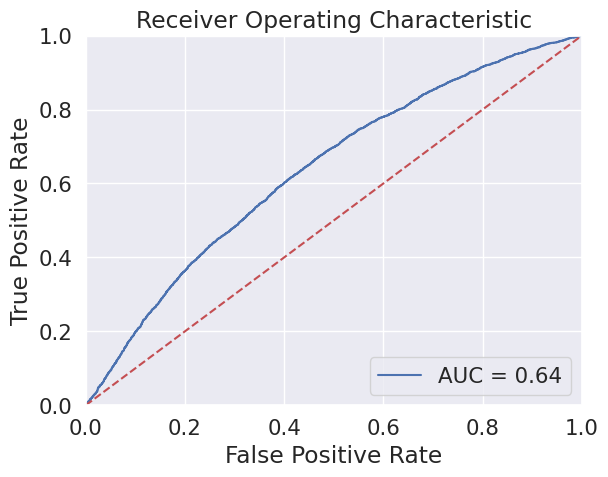

Revenue:  5994.0


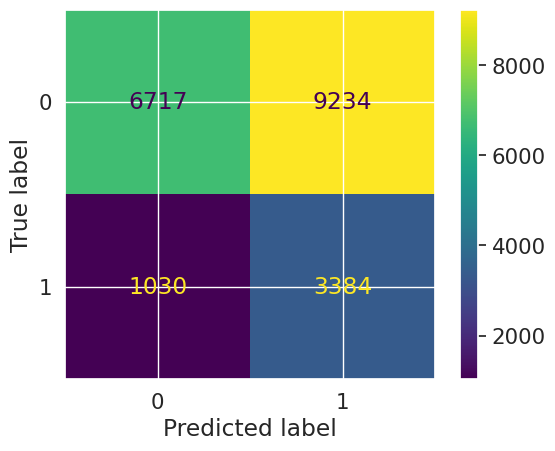

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# calculate the fpr and tpr for all thresholds of the classification

def plot_ROC_curve(Y,preds):
  fpr, tpr, threshold = metrics.roc_curve(Y, preds)
  roc_auc = metrics.auc(fpr, tpr)


  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


plot_ROC_curve(y_test,glm_fit.predict_proba(X_test)[:,1])
conf = confusion_matrix(y_test,glm_fit.predict_proba(X_test)[:,1]>0.45)
ConfusionMatrixDisplay(conf).plot()
print('Revenue: ',(5.50*(conf[1,1]))-(1.00*(conf[0,1]+conf[1,1])))

##Naive-Bayes

In [ ]:
my_ber_vars = X.select_dtypes(include=['uint8', 'bool']).columns
my_gauss_vars = X.select_dtypes(exclude=['uint8', 'bool']).columns

In [ ]:
###
# Calculate mean and variance of all the 'Gaussian'-like variablels in my_gauss_vars
###

class_list = [0,1]

means = [dict.fromkeys(my_gauss_vars) for surviv_class in class_list]
stds = [dict.fromkeys(my_gauss_vars) for surviv_class in class_list]

for surviv_class in class_list:
  print(f"Bound = {surviv_class}")
  for feature in my_gauss_vars:
    v = np.array(X_train[ y_train == surviv_class ][feature])
    means[surviv_class][feature] = np.nanmean(v)
    stds[surviv_class][feature] = np.nanstd(v)
    #print(v)
    print(f'. {feature}: Mean: {np.nanmean(v):.3f}, STD: {np.nanstd(v):.3f}')



Bound = 0
. QUOTEDATE: Mean: 0.519, STD: 0.252
. VEHICLEYEAR: Mean: 0.887, STD: 0.065
. ANNUAL_KM: Mean: 0.030, STD: 0.017
. YEAR_OF_BIRTH: Mean: 0.645, STD: 0.192
. YEARS_LICENSED: Mean: 0.280, STD: 0.222
. CONVICTION_COUNT_MINOR_3YRS: Mean: 0.164, STD: 0.529
. CONVICTION_COUNT_MAJOR_3YRS: Mean: 0.004, STD: 0.080
. CONVICTION_COUNT_CRIMINAL_3YRS: Mean: 0.007, STD: 0.093
. ASSIGNED_LOSSES_PD_5YRS: Mean: 0.059, STD: 0.246
. SUSPENSION_COUNT: Mean: 0.008, STD: 0.105
Bound = 1
. QUOTEDATE: Mean: 0.520, STD: 0.249
. VEHICLEYEAR: Mean: 0.884, STD: 0.066
. ANNUAL_KM: Mean: 0.030, STD: 0.016
. YEAR_OF_BIRTH: Mean: 0.656, STD: 0.185
. YEARS_LICENSED: Mean: 0.281, STD: 0.209
. CONVICTION_COUNT_MINOR_3YRS: Mean: 0.162, STD: 0.464
. CONVICTION_COUNT_MAJOR_3YRS: Mean: 0.001, STD: 0.041
. CONVICTION_COUNT_CRIMINAL_3YRS: Mean: 0.003, STD: 0.064
. ASSIGNED_LOSSES_PD_5YRS: Mean: 0.057, STD: 0.235
. SUSPENSION_COUNT: Mean: 0.005, STD: 0.092


In [ ]:

###
# Calculate mean (i.e. probability p) of all the 'Bernoulli'-like variablels in my_ber_vars
###

p = [dict.fromkeys(my_ber_vars) for surviv_class in class_list]

for surviv_class in class_list:
  print(f"Bound = {surviv_class}")
  for feature in my_ber_vars:
    v = np.array(X_train[ y_train == surviv_class ][feature])
    p[surviv_class][feature] = (np.nansum(v) + 1)/(np.sum(~np.isnan(v)) + 1) #use the formula with +1's to avoid the situation of 0 prob estimates
    #print(v)
    print(f'. {feature}: p {np.nanmean(v):.3f}')

Bound = 0
. AREA_1: p 0.011
. AREA_2: p 0.003
. AREA_3: p 0.008
. AREA_4: p 0.005
. AREA_5: p 0.003
. AREA_6: p 0.005
. AREA_7: p 0.002
. AREA_8: p 0.011
. AREA_9: p 0.081
. AREA_10: p 0.150
. AREA_11: p 0.122
. AREA_12: p 0.203
. AREA_13: p 0.117
. AREA_14: p 0.007
. AREA_15: p 0.002
. AREA_16: p 0.080
. AREA_18: p 0.001
. AREA_19: p 0.004
. POST_1: p 0.011
. POST_2: p 0.003
. POST_3: p 0.000
. POST_4: p 0.005
. POST_5: p 0.003
. POST_6: p 0.000
. POST_7: p 0.058
. POST_8: p 0.161
. POST_9: p 0.104
. POST_10: p 0.247
. POST_11: p 0.139
. POST_12: p 0.002
. POST_13: p 0.005
. POST_14: p 0.001
. POST_15: p 0.113
. POST_16: p 0.010
. POST_17: p 0.074
. POST_18: p 0.064
. VEHICLEMAKE_CHEVROLET: p 0.051
. VEHICLEMAKE_DODGE/RAM TRUCK/VAN: p 0.065
. VEHICLEMAKE_FORD TRUCK/VAN: p 0.075
. VEHICLEMAKE_HONDA: p 0.091
. VEHICLEMAKE_TOYOTA: p 0.082
. VEHICLEUSE_Business: p 0.023
. VEHICLEUSE_Commute: p 0.635
. VEHICLEUSE_Courtesy Car: p 0.000
. VEHICLEUSE_Driver Training: p 0.000
. VEHICLEUSE_Farm

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


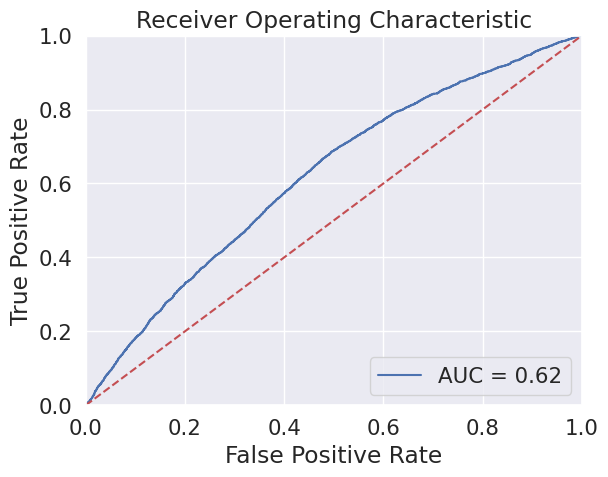

Revenue:  5739.5


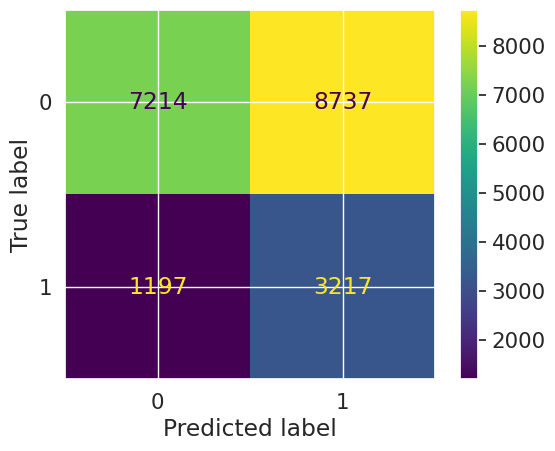

In [ ]:
###
# Compute the negative log-likelhood of each class according to Naive Bayes
###


def sigmoid(x):
  return 1/(1+np.exp(x))

nLL = [0 for surviv_class in [0,1]]
for i in [0,1]:
  nLL[i] = -sum( [ 0.5*( (X_test[var] - means[i][var])/stds[i][var] )**2 for var in my_gauss_vars ] )

  ber_factor = 3.9#increasing the importance of these variables seems to help!
  nLL[i] += ber_factor*sum( [ X_test[var]*np.log( p[i][var])  for var in my_ber_vars])
test_probabilities = sigmoid(nLL[0] - nLL[1])

plot_ROC_curve(y_test,test_probabilities)

conf = confusion_matrix(y_test,test_probabilities>0.35)
print('Revenue: ', (5.50*(conf[1,1]))-(1.00*(conf[0,1]+conf[1,1])))
metrics.ConfusionMatrixDisplay(conf).plot()

In [ ]:
from sklearn.metrics import classification_report
target_names = ['not bound', 'is bound']
print(classification_report(y_test, test_probabilities>0.35, target_names=target_names))

              precision    recall  f1-score   support

   not bound       0.86      0.45      0.59     15951
    is bound       0.27      0.73      0.39      4414

    accuracy                           0.51     20365
   macro avg       0.56      0.59      0.49     20365
weighted avg       0.73      0.51      0.55     20365



#Final model
By assessing the metrics such as AUC, accuracy, revenue, and f1-score, I have selected the logistic regression model to use on the test set (next section) as it performs better. This is most likely because of the interdependency of the variables. A key assumption of the Naive-Bayes model is that the variables are independent, which may not be true for the variables in this dataset.

#Test Set

In [ ]:
# Loading the dataset
df = pd.read_excel('/content/Cooperators_Quotes_Dataset_Test.xlsx')
print(len(df))
df.head()

15114


,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_LICENSED,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0


In [ ]:
#printing all unique elements of every column
for col in df:
    print(df[col].name, df[col].dtype)
    print("Unique:", len(df[col].unique()))
    print(df[col].unique())
    print("-------------------------------------------------------------------------------------------------------")


QUOTEDATE datetime64[ns]
Unique: 52
['2017-01-03T00:00:00.000000000' '2017-01-04T00:00:00.000000000'
 '2017-01-05T00:00:00.000000000' '2017-01-06T00:00:00.000000000'
 '2017-01-09T00:00:00.000000000' '2017-01-11T00:00:00.000000000'
 '2017-01-12T00:00:00.000000000' '2017-01-13T00:00:00.000000000'
 '2017-01-17T00:00:00.000000000' '2017-01-18T00:00:00.000000000'
 '2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000' '2017-01-26T00:00:00.000000000'
 '2017-01-27T00:00:00.000000000' '2017-01-28T00:00:00.000000000'
 '2017-01-30T00:00:00.000000000' '2017-01-31T00:00:00.000000000'
 '2017-02-01T00:00:00.000000000' '2017-02-02T00:00:00.000000000'
 '2017-02-03T00:00:00.000000000' '2017-02-05T00:00:00.000000000'
 '2017-02-06T00:00:00.000000000' '2017-02-07T00:00:00.000000000'
 '2017-02-08T00:00:00.000000000' '2017-02-09T00:00:00.000000000'
 '2017-02-10T00:00:00.000000000' '2017-02-13T00:00:00.

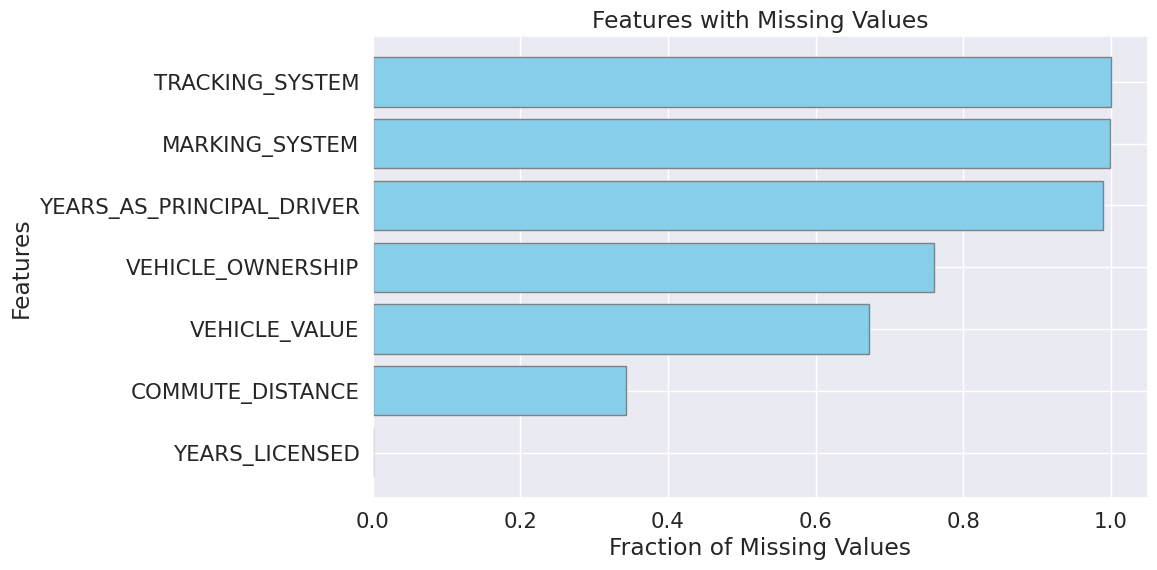

In [ ]:
#making a bar plot to show missing values
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df = df.drop(columns = 'TRACKING_SYSTEM')
df = df.drop(columns = 'MARKING_SYSTEM')
df = df.drop(columns = 'YEARS_AS_PRINCIPAL_DRIVER')
df = df.drop(columns = 'VEHICLE_OWNERSHIP')
df = df.drop(columns = 'VEHICLE_VALUE')
df = df.drop(columns = 'COMMUTE_DISTANCE')
df = df.drop(columns = 'OCCUPATION')

df = df.drop(columns = 'VEHICLEMODEL')

In [ ]:
df = df.dropna()

In [ ]:
#replacing 9999 value in YOB variable with 1999
df['YEAR_OF_BIRTH'] = df['YEAR_OF_BIRTH'].replace(9999, 1999)

##Clustering Variables: Area Code and Postal Code

In [ ]:
#clustering AREA_CODE by geographic location to reduce number of variables
area_1 = [867]
area_2 = [236,250,257,672,778]
area_3 = [368, 587, 780, 825]
area_4 = [368,403,587,825]
area_5 = [236,257,604,672,778]
area_6 = [306,474,639]
area_7 = [204,431,584]
area_8 = [807]
area_9 = [249, 683, 705]
area_10 = [226,382,519,548]
area_11 = [289,365,742,905]
area_12 = [416,437,647,942]
area_13 = [343,613,753]
area_14 = [263,438,514]
area_15= [354, 450, 579]
area_16 = [782, 902]
area_17 = [428,506]
area_18 = [367, 418, 581]
area_19 = [468,819,873]
area_20 = [709,879]

df['AREA_1'] = df['AREA_CODE'].isin(area_1)
df['AREA_2'] = df['AREA_CODE'].isin(area_2)
df['AREA_3'] = df['AREA_CODE'].isin(area_3)
df['AREA_4'] = df['AREA_CODE'].isin(area_4)
df['AREA_5'] = df['AREA_CODE'].isin(area_5)
df['AREA_6'] = df['AREA_CODE'].isin(area_6)
df['AREA_7'] = df['AREA_CODE'].isin(area_7)
df['AREA_8'] = df['AREA_CODE'].isin(area_8)
df['AREA_20'] = df['AREA_CODE'].isin(area_20)
df['AREA_9'] = df['AREA_CODE'].isin(area_9)
df['AREA_10'] = df['AREA_CODE'].isin(area_10)
df['AREA_11'] = df['AREA_CODE'].isin(area_11)
df['AREA_12'] = df['AREA_CODE'].isin(area_12)
df['AREA_13'] = df['AREA_CODE'].isin(area_13)
df['AREA_14'] = df['AREA_CODE'].isin(area_14)
df['AREA_15'] = df['AREA_CODE'].isin(area_15)
df['AREA_16'] = df['AREA_CODE'].isin(area_16)
df['AREA_17'] = df['AREA_CODE'].isin(area_17)
df['AREA_18'] = df['AREA_CODE'].isin(area_18)
df['AREA_19'] = df['AREA_CODE'].isin(area_19)





In [ ]:
#clustering POSTAL_CODE by geographic location to reduce number of variables
df['POST_1'] = df['POSTAL_CODE'].str.startswith('Y')
df['POST_2'] = df['POSTAL_CODE'].str.startswith('X')
df['POST_3'] = df['POSTAL_CODE'].str.startswith('V')
df['POST_4'] = df['POSTAL_CODE'].str.startswith('T')
df['POST_5'] = df['POSTAL_CODE'].str.startswith('S')
df['POST_6'] = df['POSTAL_CODE'].str.startswith('R')
df['POST_7'] = df['POSTAL_CODE'].str.startswith('P')
df['POST_8'] = df['POSTAL_CODE'].str.startswith('N')
df['POST_9'] = df['POSTAL_CODE'].str.startswith('M')
df['POST_10'] = df['POSTAL_CODE'].str.startswith('L')
df['POST_11'] = df['POSTAL_CODE'].str.startswith('K')
df['POST_12'] = df['POSTAL_CODE'].str.startswith('H')
df['POST_13'] = df['POSTAL_CODE'].str.startswith('J')
df['POST_14'] = df['POSTAL_CODE'].str.startswith('G')
df['POST_15'] = df['POSTAL_CODE'].str.startswith('A')
df['POST_16'] = df['POSTAL_CODE'].str.startswith('C')
df['POST_17'] = df['POSTAL_CODE'].str.startswith('B')
df['POST_18'] = df['POSTAL_CODE'].str.startswith('E')


In [ ]:
df = df.drop(columns = 'AREA_CODE')
df = df.drop(columns = 'POSTAL_CODE')
df

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,ANNUAL_KM,VEHICLEUSE,GENDER,YEAR_OF_BIRTH,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,...,POST_9,POST_10,POST_11,POST_12,POST_13,POST_14,POST_15,POST_16,POST_17,POST_18
0,2017-01-03,2002,HONDA,10000,Commute,Male,1993,7.0,No,Single,...,False,False,False,False,False,False,False,False,False,False
1,2017-01-04,2010,FORD TRUCK/VAN,10000,Commute,Male,1987,13.0,Yes,Single,...,False,False,False,False,False,False,False,False,False,False
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,9000,Commute,Male,1967,33.0,Yes,Single,...,False,False,False,False,False,False,False,False,False,False
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,10000,Commute,Male,1992,9.0,No,Single,...,False,False,False,False,False,False,False,False,False,False
4,2017-01-04,2014,FORD,20000,Commute,Female,1995,4.0,No,Single,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15109,2017-02-27,2012,HONDA,20000,Commute,Female,1988,9.0,Yes,Single,...,False,True,False,False,False,False,False,False,False,False
15110,2017-02-27,2011,BMW,10000,Commute,Male,1973,27.0,Yes,Married,...,False,False,False,False,False,False,False,False,False,False
15111,2017-02-27,2007,HONDA TRUCK/VAN,15000,Commute,Male,1961,32.0,Yes,Married,...,False,True,False,False,False,False,False,False,False,False
15112,2017-02-27,2014,HONDA TRUCK/VAN,12000,Commute,Female,1991,9.0,Yes,Single,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#one-hot encoding nominal variables
# Find remaining features of string type
string_columns = [col for col in df.columns if df[col].dtype == 'object']

# Convert string columns to one-hot encodings
df = pd.get_dummies(df, columns=string_columns, prefix=string_columns)

In [ ]:
#removing all vehicle make nominal variables which do not have atleast 5% of row count
makes = ['VEHICLEMAKE_TOYOTA', 'VEHICLEMAKE_HONDA','VEHICLEMAKE_CHEVROLET','VEHICLEMAKE_FORD TRUCK/VAN','VEHICLEMAKE_DODGE/RAM TRUCK/VAN'] #list obtained from first section
for col in df.columns:

  if col.startswith('VEHICLEMAKE_'):
    if col in makes:
      print(col)
    else:
      df = df.drop(columns = col )

VEHICLEMAKE_CHEVROLET
VEHICLEMAKE_DODGE/RAM TRUCK/VAN
VEHICLEMAKE_FORD TRUCK/VAN
VEHICLEMAKE_HONDA
VEHICLEMAKE_TOYOTA


In [ ]:
df['QUOTEDATE'] = pd.to_numeric(df['QUOTEDATE'])
cols_to_norm = ['QUOTEDATE','VEHICLEYEAR', 'ANNUAL_KM', 'YEAR_OF_BIRTH', 'YEARS_LICENSED']

In [ ]:
df[cols_to_norm]=(df[cols_to_norm]-df[cols_to_norm].min())/(df[cols_to_norm].max()-df[cols_to_norm].min())

In [ ]:
df = df.drop(columns = ['GENDER_Male', 'MULTI_PRODUCT_No', 'AREA_20', 'AREA_17'])

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15111 entries, 0 to 15113
Data columns (total 66 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   QUOTEDATE                               15111 non-null  float64
 1   VEHICLEYEAR                             15111 non-null  float64
 2   ANNUAL_KM                               15111 non-null  float64
 3   YEAR_OF_BIRTH                           15111 non-null  float64
 4   YEARS_LICENSED                          15111 non-null  float64
 5   CONVICTION_COUNT_MINOR_3YRS             15111 non-null  int64  
 6   CONVICTION_COUNT_MAJOR_3YRS             15111 non-null  int64  
 7   CONVICTION_COUNT_CRIMINAL_3YRS          15111 non-null  int64  
 8   ASSIGNED_LOSSES_PD_5YRS                 15111 non-null  int64  
 9   SUSPENSION_COUNT                        15111 non-null  int64  
 10  AREA_1                                  15111 non-null  bo

In [ ]:
X = df.drop(columns = 'VEHICLEUSE_Fire Department - Emergency')
cols_when_model_builds = glm_fit.feature_names_in_
X = X[cols_when_model_builds]

predictions = (glm_fit.predict_proba(X)[:,1]>0.45).astype(int)
list_predictions = predictions.tolist()

print(list_predictions)

[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 